In [82]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
df = pd.read_csv('marketing_campaign.csv', sep=';')   ##Sep as ;
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [71]:
# Remove rows where 'y' is NaN
df_cleaned = df.dropna(subset=['y'])

# Proceed with the conversion of 'y' from 'yes'/'no' to 1/0
df_cleaned['y'] = df_cleaned['y'].map({'yes': 1, 'no': 0})

# Set dummies
df_dummies = pd.get_dummies(df_cleaned[['job', 'marital', 'education']])  # Convert 'job', 'marital', 'education' into dummy variables
df_dummies

# x and y
df_dummies['balance'] = df_cleaned['balance']
df_dummies['duration'] = df_cleaned['duration']
X = df_dummies  # 
y = df_cleaned['y']

## 2.A

In [72]:
## Allocate train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
# Set the range of trees
n_trees = [1, 2, 3, 4, 5, 10, 20, 50]

#Sets for store test results
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [74]:
# Iterate over different numbers of trees
for n in n_trees:
    clf = RandomForestClassifier(n_estimators=n, max_features='sqrt', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate and store scores
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

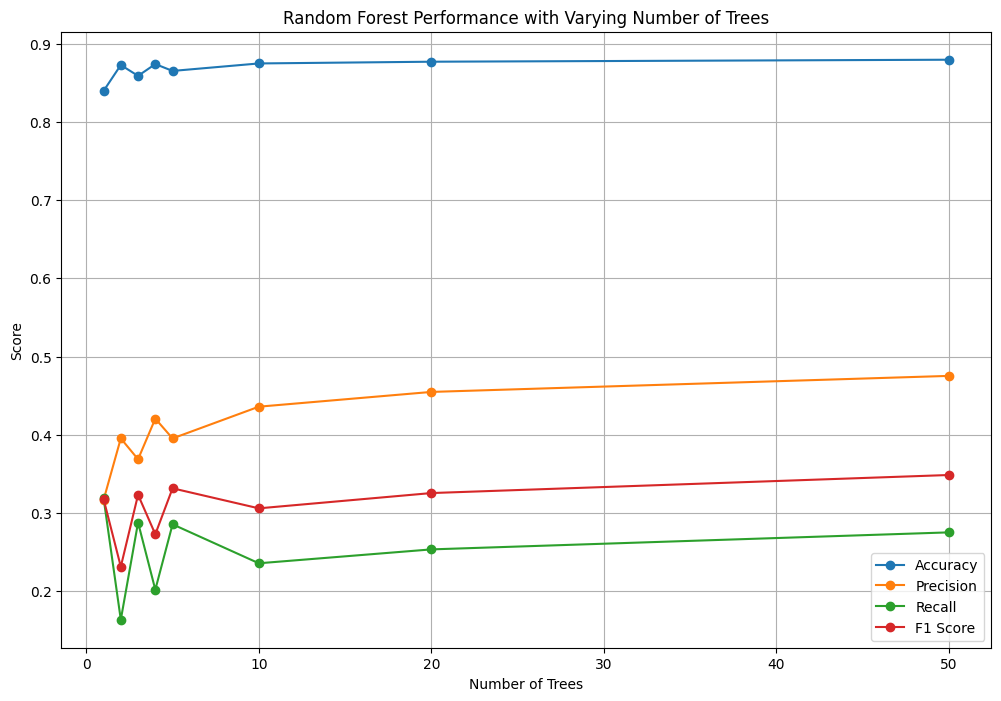

In [75]:
# Plotting the metrics
plt.figure(figsize=(12, 8))

plt.plot(n_trees, accuracy_scores, label='Accuracy', marker='o')
plt.plot(n_trees, precision_scores, label='Precision', marker='o')
plt.plot(n_trees, recall_scores, label='Recall', marker='o')
plt.plot(n_trees, f1_scores, label='F1 Score', marker='o')

plt.title('Random Forest Performance with Varying Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

the results ,expecilly for F1 score and precision raised and became stable by the increase of number of trees.

## 2.B

D:\Anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\Anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` w

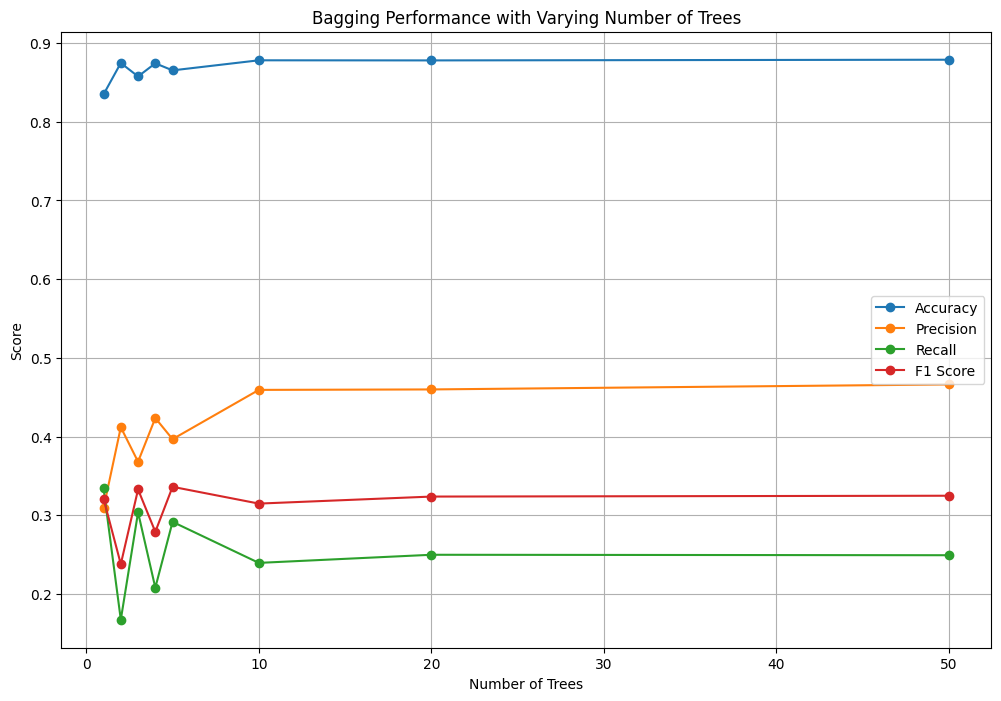

In [81]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over each number of trees to train and evaluate the Bagging Classifier
for n in n_trees:
    bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n, max_features=1.0, random_state=42)
    bagging_clf.fit(X_train, y_train)
    y_pred = bagging_clf.predict(X_test)
    
    # Append the scores only once per iteration of the loop
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))



# Plotting performance metrics
plt.figure(figsize=(12, 8))

plt.plot(n_trees, accuracy_scores, label='Accuracy', marker='o')
plt.plot(n_trees, precision_scores, label='Precision', marker='o')
plt.plot(n_trees, recall_scores, label='Recall', marker='o')
plt.plot(n_trees, f1_scores, label='F1 Score', marker='o')

plt.title('Bagging Performance with Varying Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

The overall results are not much different from Random Forest, and the F-1 Score even decreases

## 2.C

In [83]:
# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = clf.feature_importances_

# Combine feature names and their importance scores
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by their importance
features_sorted = features.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(features_sorted)

                Feature  Importance
20             duration    0.527430
19              balance    0.382895
5           job_retired    0.007839
8           job_student    0.006195
17   education_tertiary    0.005741
1       job_blue-collar    0.005642
13      marital_married    0.005483
14       marital_single    0.005417
9        job_technician    0.005117
16  education_secondary    0.005087
4        job_management    0.005037
0            job_admin.    0.004883
12     marital_divorced    0.004428
10       job_unemployed    0.004148
15    education_primary    0.004115
7          job_services    0.004092
6     job_self-employed    0.004020
18    education_unknown    0.003762
2      job_entrepreneur    0.003574
3         job_housemaid    0.003394
11          job_unknown    0.001702


There are clearly dominating features in your results.'duration'feature has the highest importance score, significantly more than any other feature, indicating it is the most influential in predicting the target variable.

## 2.D

I guess it may comes fromModel Instability: With very few trees, each tree has a significant impact on the overall model's decisions. Small changes in the data can lead to large changes in the tree structure, hence in the overall model prediction.